# Cálculo do Dual Scaling em Python

In [1]:
#imports necessários 
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.lines as lines

## Matriz de Padrão de Respostas F

In [2]:
#Matriz de padrão de respostas F
F = np.matrix([
[1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0],
[1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1],
[0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1],
[0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0],
[0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0],
[0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0],
[0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1],
[1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1],
[0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0],
[1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1],
[0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0],
[0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0],
[0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0],
[1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0],
[0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0]])

#print(F)

## Número de Dimensões do Espaço-solução (ns)

In [3]:
q = 6 #número de questões (categorias)
m = F.shape[1] #número de itens
n = F.shape[0] #número de transações

ns = m - q - 1

print('Total de Dimensões: ', ns,'.')

Total de Dimensões:  11 .


## Matriz Diagonal de Linhas (Dr) 

In [4]:
#Cálculo da Matriz Diagonal de Linhas de F
fr = np.sum(F, axis=1)
Dr = np.diagflat(fr)

#print(Dr)

In [5]:
#Cálculo da Matriz Diagonal de Colunas de F
fc = np.sum(F, axis=0)
Dc = np.diagflat(fc)
#print(Dc)

## Matriz Resultante (M)

In [6]:
Ft = np.transpose(F) #Matriz Transporta de F
Dri = np.linalg.inv(Dr) #Matriz Invertida de Dr
Dci = np.linalg.inv(Dc) #Matriz Invertida de Dc

#Cálculo da Matriz M
M = Ft * Dri * F * Dci

#print(M)

## Autovalores (AD) e Autovetores (AV) de M

In [7]:
#Array de Autovalores (uAD) e Autovetores (uAV) de M.
uAD, uAV = np.linalg.eig(M)

#Ordenando os Autovalores
AD = np.flip(np.sort(uAD, axis=0),0)

#np.savetxt('AV_python.txt',uAV.astype(np.float32))

#Ordenando os Autovetores em função dos Autovalores
uAVt = uAV.T.tolist()
AV=[]
for r in AD:
    #print(n)
    ix = uAD.tolist().index(r)
    AV.append(uAVt[ix])

#convertendo o resultado de um tipo complexo para Float32    
AD = AD.astype(np.float32)
AV = np.array(AV).T.astype(np.float32)

#removendo a primeira dimensão
AD = np.delete(AD,0,0)
AV = np.delete(AV,0,1)

#removendo as demais dimensões que devem ser desconsideradas (de forma que fiquem com dimensão ns)
count = ns
while count < AD.shape[0]:
    AD = np.delete(AD,count,0)
    AV = np.delete(AV,count,1)

#print(AD)
#print(AV)



C:\Program Files\Anaconda3\envs\tcc\lib\site-packages\ipykernel_launcher.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Program Files\Anaconda3\envs\tcc\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part


## rho

In [8]:
# Cálculo da Matriz unidimensional rho
rho = []

for i in range(ns):
    rho.append(math.sqrt(AD.tolist()[i]))

rho = np.array(rho)
#print(rho)            

## Matriz Produto de Hadamard (H)

In [9]:
#Calculo da produto de Hadamard de Autovetores * autovetores
H = np.multiply(AV,AV)
#print(H.astype(np.float32))

## Matriz T

In [10]:
#Matriz resultante T
T = Dc * H

#print(T.astype(np.float32))

## Matriz Cc

In [11]:
sumCols = np.sum(T, axis=0).tolist()[0]
#print (sumCols)
ft = np.sum(F)
Cc = []
for i in range(ns):
    Cc.append(math.sqrt(ft/sumCols[i]))

#print (Cc)    


## Peso padrão dos Itens (x-normed)

In [12]:
#multiplicação da matriz de autovetores pela matrix Cc
x_normed = []
for r in AV:
    x_normed.append(np.multiply(r,Cc))

#print (np.array(x_normed))

## Peso projetado dos Itens (x-projected)

In [13]:
#Resultado Principal do Dual Scaling
x_projected = []
for r in x_normed:
    x_projected.append(np.multiply(r,rho))

x_projected = np.array(x_projected)
#print (x_projected)

## Peso padrão das Transações (y-normed)

In [14]:
W = F * x_normed
#print (W)
y_normed = np.ndarray(shape=(W.shape[0],W.shape[1]), dtype=float)
for j in range(W.shape[1]):
    for i in range(W.shape[0]):
        y_normed.itemset((i,j),W.item(i,j)/(rho.item(j)*fr.item(i)))
       
#print(y_normed)


## Peso projetado das Transações (y-projected)

In [15]:
y_projected = []
for r in y_normed:
    y_projected.append(np.multiply(r,rho))

y_projected = np.array(y_projected) 
#print (y_projected)

## Calculando Delta (d)

In [16]:
d = []
s = 100/np.sum(AD)
for r in AD:
    d.append(s*r)
#print(d)

## Calculando a Distância entre os Itens (DM)

In [17]:
DM = np.ndarray(shape=(x_projected.shape[0],x_projected.shape[0]), dtype=float)
for i in range(x_projected.shape[0]):
    for j in range(x_projected.shape[0]):
        quad_dist = 0
        for aux in range(ns):
            dist = (x_projected.item((i, aux)) / math.sqrt(fc.item(i)/n)) - (x_projected.item((j, aux)) / math.sqrt(fc.item(j)/n))
            quad_dist += (dist * dist)*rho.item(aux)
            #if(i == 2 and j== 8):
                #print("Valor de i = ", i+1)
                #print("Valor de j = ", j+1)
                #print("Valor de aux = ", aux+1)
                #print((dist * dist)*rho.item(aux))
        DM.itemset((i,j),quad_dist)
        DM.itemset((j,i),quad_dist)

#print(DM)
        
    

## Calculando a Distância entre as transacões (DN)

In [18]:
DN = np.ndarray(shape=(y_projected.shape[0],y_projected.shape[0]), dtype=float)
for i in range(y_projected.shape[0]):
    for j in range(y_projected.shape[0]):
        quad_dist = 0
        for aux in range(ns):
            dist = (y_projected.item((i, aux)) / math.sqrt(fr.item(i)/m)) - (y_projected.item((j, aux)) / math.sqrt(fr.item(j)/m))
            #print(i)
            #print(j)
            #print(aux)
            #print((dist * dist)*rho.item(aux))
            quad_dist += (dist * dist)*rho.item(aux)
        DN.itemset((i,j),quad_dist)
        DN.itemset((j,i),quad_dist)

#print(DN)
        
    

## Calculando a Distância entre itens e transacões (D)

In [23]:
D = np.ndarray(shape=(x_projected.shape[0],y_projected.shape[0]), dtype=float)
D2 = np.ndarray(shape=(x_projected.shape[0],y_projected.shape[0]), dtype=float)
for i in range(x_projected.shape[0]):
    for j in range(y_projected.shape[0]):
        quad_dist = 0
        for aux in range(ns):
            rho2 = rho.item(aux) * rho.item(aux) 
            sqrtRho = math.sqrt(rho.item(aux))
            a2 = (y_projected.item((j, aux)) * y_projected.item((j, aux))) / (fr.item(j)/m)
            b2 = (x_projected.item((i, aux)) * x_projected.item((i, aux))) / (fc.item(i)/n)
            cos = (y_projected.item((j, aux)) * x_projected.item((i, aux))) / (math.sqrt((fr.item(j)/m)*(fc.item(i)/n)))
            #if(i==2 and j==12):
                #print(i+1)
                #print(j+1)
                #print(aux+1)
                #print("pi = ",(fc.item(i)/n))
                #print("pj = ",(fr.item(j)/m))
                #print("fci = ",(fc.item(i)))
                #print("Py2 = ",(y_projected.item((j, aux)) * y_projected.item((j, aux))))
                #print("Px2 = ",x_projected.item((i, aux))*x_projected.item((i, aux)))
                #print("Rho2 = ",rho2)
                #print("a2 = ",a2)
                #print("b2 =",b2)
                #print("cos = ",cos)
                #print("dist parcial = ",rho.item(aux) * (a2 + b2 - ((2*sqrtRho) * cos)))
            quad_dist += rho.item(aux) * (a2 + b2 - ((2*sqrtRho) * cos))
        D.itemset((i,j),quad_dist)
        D2.itemset((i,j),math.sqrt(quad_dist))
        #D.itemset((j,i),quad_dist)

#print(D)

## Gráfico solução para as duas primeiras dimensões da solução

C:\Program Files\Anaconda3\envs\tcc\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


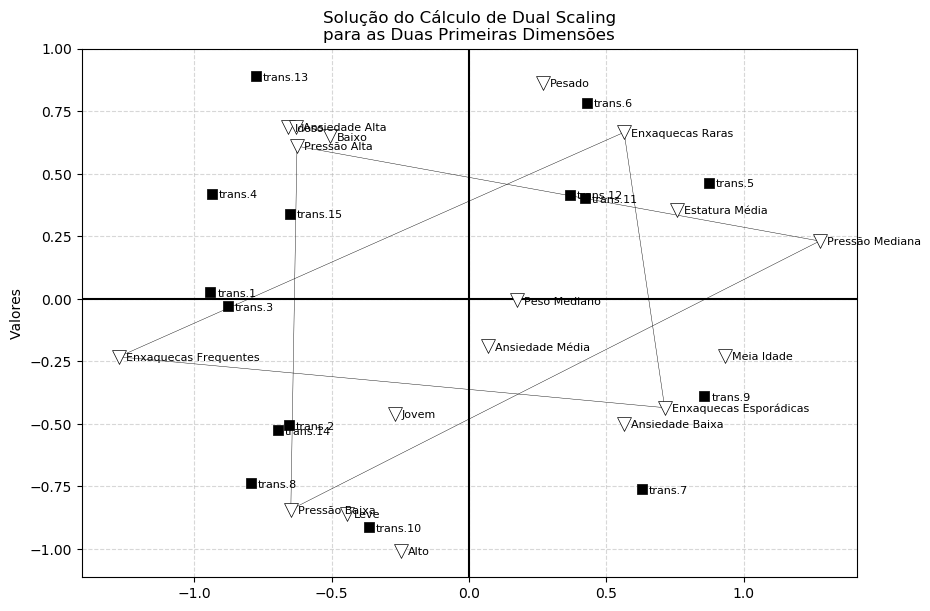

In [24]:
itens = ['Pressão Baixa','Pressão Mediana','Pressão Alta','Enxaquecas Raras','Enxaquecas Esporádicas','Enxaquecas Frequentes','Jovem','Meia Idade','Idoso','Ansiedade Baixa','Ansiedade Média','Ansiedade Alta','Leve','Peso Mediano','Pesado','Baixo','Estatura Média','Alto']
transacoes = ['trans.1','trans.2','trans.3','trans.4','trans.5','trans.6','trans.7','trans.8','trans.9','trans.10','trans.11','trans.12','trans.13','trans.14','trans.15']


#Array de coordenadas x - Itens
xD = x_projected.T.tolist()[0]
#Array de coordenadas y - Itens
yD = x_projected.T.tolist()[1]

#Array de coordenadas x - Transacoes
xY = y_projected.T.tolist()[0]
#Array de coordenadas y - Transacoes
yY = y_projected.T.tolist()[1]

#definido o tamanho do gráfico
fig = plt.figure(figsize=(10, 7), dpi=100)
ax = fig.add_subplot(111)
ax2 = fig.add_subplot(111)


#plotando o gráfico de dispersão baseado em x e y, customizando a representação dos pontos
ax.scatter(xD,yD,s=100, marker='v',zorder=10,facecolors='white', linewidths=0.5, color='black')

ax2.scatter(xY,yY,s=50, marker='s',zorder=10,facecolors='black', linewidths=0.5, color='black')

#Label do eixo y
plt.ylabel("Valores")

#título do gráfico
plt.title("Solução do Cálculo de Dual Scaling\npara as Duas Primeiras Dimensões")

# adicionar linhas de grid no fundo do gráfico
plt.grid(which='both',alpha=0.5, linestyle="dashed", zorder=1)

#adicionando uma linha mais grossa para os eixos x e y
ax.axhline(y=0, color='k', zorder=2)
ax.axvline(x=0, color='k', zorder=2)

#inserindo os nomes dos itens em cada um dos pontos
for i,j,d in zip(xD,yD,itens):
    ax.annotate(d, xy=(i,j), xytext=(5,-3), textcoords='offset points', size=8, zorder=20)
    
#inserindo os nomes das transações em cada um dos pontos
for i,j,d in zip(xY,yY,transacoes):
    ax.annotate(d, xy=(i,j), xytext=(5,-3), textcoords='offset points', size=8, zorder=20)    
    
#Criando as linhas que conectam os itens das 3 primeiras categorias (conectando todas fica muito confuso)
for e in range(0,5,3):    
    line1 = [(xD[e],yD[e]), (xD[e+1],yD[e+1])]
    line2 = [(xD[e+1],yD[e+1]), (xD[e+2],yD[e+2])]
    line3 = [(xD[e+2],yD[e+2]), (xD[e],yD[e])]
    
    (line1_xs, line1_ys) = zip(*line1)
    (line2_xs, line2_ys) = zip(*line2)
    (line3_xs, line3_ys) = zip(*line3)
    
    ax.add_line(lines.Line2D(line1_xs, line1_ys, linewidth=0.3, color='k', zorder=5))
    ax.add_line(lines.Line2D(line2_xs, line2_ys, linewidth=0.3, color='k', zorder=5))
    ax.add_line(lines.Line2D(line3_xs, line3_ys, linewidth=0.3, color='k', zorder=5))
    
    plt.plot()    

#exibindo o gráfico
plt.show()
fig.savefig('Imagens/SolucaoAnalise.svg', format='svg', dpi=1200,bbox_inches='tight') 